# Introduction and Background

Media is deeply coupled with American culture; in 2017 alone almost 600 million tickets were sold at movie theaters in the US (http://www.the-numbers.com/market/). How is the media consumed affecting the public?

One theory presents media as a possibly negative influencer of culture. Dating back even to the 1950's, media has often been villainized as an inciter of violence. More recently in 1999, a Gallup poll found that 62% of the poulation believed violent media was a major cause of violent actions (http://www.gallup.com/poll/5626/blame-game-youth-media-violence.aspx). Often mass shootings are immeditaley tied to the culprit's media consumption habits; this happenned famously with Sandy Hook, and also with San Bernardino (https://www.thea-blast.org/top-stories/2016/01/14/is-violence-in-the-media-to-blame-for-mass-shootings/).
Society clearly concedes that movies should be content restricted, and age restricted as proved with our TV censor laws as well as movie rating system (https://en.wikipedia.org/wiki/Censorship_in_the_United_States https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system). Violent films are screened, and children are prevented from viewing them. Yet common sense tells us that with media being such a hallmark of our culture, media cannot create violent people. People can enjoy violent films without being incited to commit violence.

Though there is an immediate desire to blame media for violence, research actually often states the opposite. There was a study done by the National Bureau of Economic Research in which violent films were shown to reduce violent crime and drug consumption. Specifically “estimates suggest that in the short-run violent movies deter almost 1,000 assaults on an average weekend” (http://www.nber.org/papers/w13718). This study claims that the violent nature of the films serves as an outlet for violent energy, thus leading to less committed acts. Our team wonders if there is an effect of violent media in the long run. We also wonder about the validity of their claim that the violent content itself is what influences the deterance of violent acts in the short run?

Other researchers disagree that violent films do promote aggression (http://www.nytimes.com/2008/01/07/business/media/07violence.html). This study argues that exposure to violence increases over all agressive behavior. This article however fails to answer to the fact that there is a decrease in violent crime in the short run in conjunction with violent films.

Another study, asnwering to the decrease in violent crime, says it is not the content of the films that cause that reduced crime. The paper asserts that it is not a result of genre, but a result of occupying young men (those most likely to commit violent crime). This article also offers that specific actors could contribute to crime rate as well. (https://eml.berkeley.edu/~sdellavi/wp/moviescrimeQJEProofs2009.pdf).

There is clearly a lot of controversy and differing opinions surrounding the topic of violent media's effects on the public. Does violent media have long term effects? Will the effect of violent media be seen through a larger time scale? Is violent film the only genre which will influence crime rate? Do other genres that attract young male audiences effect crime similarly to violent films?

We hope to combine these questions in one project looking at genre specifically and enlarging the time frame. This will give us a better, more complete, picture on violent crime and its interaction with media.
Our question stands: How does the number of each genre of film produced per year affect crime rate in San Diego? Is there a large scale, large time frame, influence deriving from the type of media consumed?

# Data Description

We originally started with three data sets, two relating to crime and one relating to movies.

Our movie data set was taken from Kaggle and was already pre scraped for us off of IMDB. This data set contained movies dating back 100 years, and each entry had information about title, main actor, genre, director, budget, year released, rating, and more. The data set can be found at : https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset. In total the data contains 5044 entries. We hope to use this data to make new dataframes that isolate movies by year released and by genre.

When we load this data we call it "moviedata" and the file is called "movie_metadata.csv."

We then had two data sets on crime, one national and one local to the San Diego region. Our local data set spanned from 2008 to 2012 and had detailed information on time, location, and type of each crime in the San Diego region. This data can be found at : http://data.sandiegodata.org/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract and has 797979 entries. This data will be used initally in our analysis just of the years 2008 - 2012 to see if there are local large scale effects to media consumption.

When we load this data we call it "incidents" and the file is called "incidents-5y.csv."

Our national dataset has data dating back to 1960 which reported number of crime by types (murder, robbery etc) corresponding to year. The national data set can be found at : https://data.world/government/uniform-crime-reports and had 53 entries. This data set will be used after our preliminary tests to enlarge our timescale and frame.

When we load this data we call it "reportNational" and the file is called "CrimeReports.csv."

In [1]:
#Import all the packages we needed
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import patsy
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn import datasets

In [137]:
#Load the data
moviedata = pd.read_csv("movie_metadata.csv") 
incidents = pd.read_csv("incidents-5y.csv")
reportNational = pd.read_csv("Uniform crime reports.csv")

# Data Cleaning/Pre-processing

We are only interested in certain parts of the dataframe so we're going to select the year, the title of the movie, the genre, the keywords, the country and the rating of the movie.

In [3]:
#Data Clean for the moviedata 
#Select: 
#       title_year, movie_title, genres, plot_keywords, country, content_rating
#Methods: 
#        drop all the NAN and extract "USA" movies

movie1 = moviedata[['title_year','movie_title','genres','plot_keywords','country','content_rating']]
movie2 = movie1.dropna()
movieUSA = movie2[movie2['country'] == "USA"]

USASort = movieUSA.sort_values(['title_year'], ascending = True)

In [4]:
#sort values in ascending year from 2008 to 2012
Myear0812 = USASort[(USASort['title_year'] >= 2008) & (USASort['title_year'] <= 2012)].reset_index(drop=True)

We think that roughly the same number of movies have been released each year between 2008 and 2012 so we're going to visualize it.


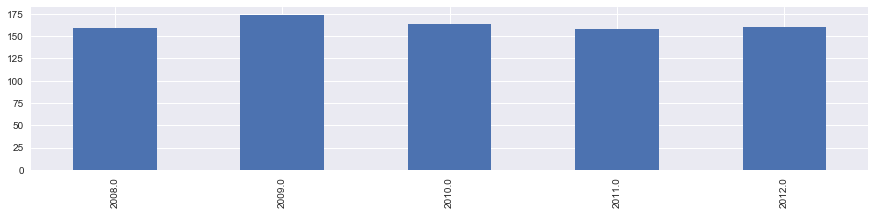

In [5]:
#Movie production in each year from 2008-2012 approximate the same
plt.figure(figsize = (15,3))
year = Myear0812.loc[:, 'title_year'].value_counts().sort_index()

year.plot.bar()

In [6]:
#Sort data into df by year
Mgy08 = USASort[USASort['title_year'] == 2008.0]
Mgy09 = USASort[USASort['title_year'] == 2009.0]
Mgy10 = USASort[USASort['title_year'] == 2010.0]
Mgy11 = USASort[USASort['title_year'] == 2011.0]
Mgy12 = USASort[USASort['title_year'] == 2012.0]

In [7]:
#Set Variable for all movie genres 
ser_genres = ['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama','Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western']


In [8]:
#Creating a new data frame for 2008 to 2012
df08 = pd.DataFrame(ser_genres)
df08['n'] = 0
df08.columns =['genres','n']
df09 = pd.DataFrame(ser_genres)
df09['n'] = 0
df09.columns =['genres','n']
df10 = pd.DataFrame(ser_genres)
df10['n'] = 0
df10.columns =['genres','n']
df11 = pd.DataFrame(ser_genres)
df11['n'] = 0
df11.columns =['genres','n']
df12 = pd.DataFrame(ser_genres)
df12['n'] = 0
df12.columns =['genres','n']

In [9]:
#Function: get a substring from the Series and return number x in series, y in string
def countString(x, y):
    num = x.str.contains(y).value_counts()      
    if num[False] == len(x):
        return 0
    else:
        num = num[True]
        return num

In [10]:
#Function: get data and store in df_temp
def fillDataFramesMov(database,df_temp):
    for i in range (0,len(df_temp)):
        n = countString(database['genres'],df_temp.ix[i,'genres'])
        df_temp.ix[i,'n'] = n 
    return df_temp

In [11]:
def fillDataFramesCrime(database,df_temp):
    for i in range (0,len(df_temp)):
        n = countString(database['type'],df_temp.ix[i,'crime'])
        df_temp.ix[i,'n'] = n 
    return df_temp

In [12]:
#Assign frequency to the movie genres in 2008
df08 = fillDataFramesMov(Mgy08,df08)

In [13]:
#Assign frequency to the movie genres in 2009
df09 = fillDataFramesMov(Mgy09,df09)

In [14]:
#Assign frequency to the movie genres in 2010
df10 = fillDataFramesMov(Mgy10,df10)

In [15]:
#Assign frequency to the movie genres in 2011
df11 = fillDataFramesMov(Mgy11,df11)

In [16]:
#Assign frequency to the movie genres in 2012
df12 = fillDataFramesMov(Mgy12,df12)

In [103]:
#Clean for the incidents data
#Select: year, is_night, type, city, nbrhood, asr_zone, lat, lon
#Method: assuming incidents happened in commercial area (asr_zone = 6.0)
#        we want population close to the theather(commmerical) area 
#        drop all NAN.
#        taking 1000 samples randomly

incidents1 = incidents[['year', 'is_night', 'type', 'city', 'nbrhood', 'asr_zone', 'lat', 'lon']]
incidentsN = incidents1.dropna()

commercial = incidentsN[incidentsN['asr_zone'] == 6]

c = commercial.sample(n=1000).reset_index(drop=True)


We want to know which crimes occur more often than others. We don't think that each type of crime occurs as often as others. Let's visualize this in the form of a bar graph.

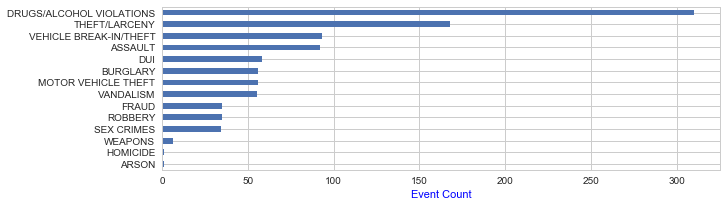

In [104]:
#Categorization of crime from our 1000 samples
plt.figure(figsize = (10,3))
x = c.loc[:, 'type'].value_counts()  
x.plot.barh().invert_yaxis()

plt.xlabel('Event Count', color = "Blue")

f1 = plt.gcf()

We see that drug and alcohol violations are the most popular in San Diego but the number of theft/larceny crimes are much higher than the number of sex crimes and ones regarding weapons.

In [105]:
#Get each title year in crime
c08 = c[c['year'] == 2008]
c09 = c[c['year'] == 2009]
c10 = c[c['year'] == 2010]
c11 = c[c['year'] == 2011]
c12 = c[c['year'] == 2012]

In [106]:
#Crime by category
ser_crimes = ['DRUGS','LARCENY','VEHICLE','MOTOR','ASSAULT','BURGLARY','VANDALISM','DUI','ROBBERY','FRAUD','SEX','WEAPONS','ARSON','HOMICIDE']


In [107]:
#Creating a new data frame for 2008 to 2012
dfc08 = pd.DataFrame(ser_crimes)
dfc08['n'] = 0
dfc08.columns =['crime','n']
dfc09 = pd.DataFrame(ser_crimes)
dfc09['n'] = 0
dfc09.columns =['crime','n']
dfc10 = pd.DataFrame(ser_crimes)
dfc10['n'] = 0
dfc10.columns =['crime','n']
dfc11 = pd.DataFrame(ser_crimes)
dfc11['n'] = 0
dfc11.columns =['crime','n']
dfc12 = pd.DataFrame(ser_crimes)
dfc12['n'] = 0
dfc12.columns =['crime','n']

In [108]:
#Assign frequency to the movie genres in 2008
dfc08 = fillDataFramesCrime(c08,dfc08)

In [109]:
#Assign frequency to the movie genres in 2009
dfc09 = fillDataFramesCrime(c09,dfc09)

In [110]:
#Assign frequency to the movie genres in 2010
dfc10 = fillDataFramesCrime(c10,dfc10)

In [111]:
#Assign frequency to the movie genres in 2011
dfc11 = fillDataFramesCrime(c11,dfc11)

In [112]:
#Assign frequency to the movie genres in 2012
dfc12 = fillDataFramesCrime(c12,dfc12)

Movie genres in year: df08 - df12
, Crime type in year: dfc08 - dfc12

In [113]:
#Merge all Genres by Year
df08.columns = ['Genres','2008']
df09.columns = ['Genres','2009']
df10.columns = ['Genres','2010']
df11.columns = ['Genres','2011']
df12.columns = ['Genres','2012']

genresY = df08.merge(df09, on='Genres').merge(df10, on='Genres').merge(df11, on='Genres').merge(df12, on='Genres')
genresY = pd.pivot_table(genresY, index = 'Genres')

In [114]:
#Merge all Crime by Year
dfc08.columns = ['Crime','2008']
dfc09.columns = ['Crime','2009']
dfc10.columns = ['Crime','2010']
dfc11.columns = ['Crime','2011']
dfc12.columns = ['Crime','2012']

crimeY = dfc08.merge(dfc09, on='Crime').merge(dfc10, on='Crime').merge(dfc11, on='Crime').merge(dfc12, on='Crime')

#removes rows and columns with only 0s
#used later for chi-squared test
crime_no_zero = crimeY[:12]
crime_no_zero = crime_no_zero.drop('2012', 1)
crime_no_zero = pd.pivot_table(crime_no_zero, index = "Crime")
#crime_no_zero

crime_pivot = pd.pivot_table(crimeY, index = "Crime")
crime_pivot
crimeY

,Crime,2008,2009,2010,2011,2012
0,DRUGS,73,68,65,50,54
1,LARCENY,30,31,26,38,43
2,VEHICLE,39,26,31,32,21
3,MOTOR,17,7,13,12,7
4,ASSAULT,18,25,17,16,16
5,BURGLARY,9,7,15,14,11
6,VANDALISM,16,11,7,10,11
7,DUI,9,17,14,12,6
8,ROBBERY,7,5,8,10,5
9,FRAUD,8,6,12,6,3


In [115]:
#Creates data frame with columns being genres
genByGen = genresY.transpose()
genByGen.columns = ser_genres
#genByGen = genByGen.drop(genByGen.index[[0]])
genByGen.index.name = 'Year'
#genByGen

In [116]:
#Creates data frame with columns being crime genres
criByCri = crimeY.transpose()
criByCri.columns = ser_crimes
criByCri = criByCri.drop(criByCri.index[[0]])
criByCri.index.name = 'Year'
criByCri

,DRUGS,LARCENY,VEHICLE,MOTOR,ASSAULT,BURGLARY,VANDALISM,DUI,ROBBERY,FRAUD,SEX,WEAPONS,ARSON,HOMICIDE
Year,,,,,,,,,,,,,,
2008,73,30,39,17,18,9,16,9,7,8,8,3,0,1
2009,68,31,26,7,25,7,11,17,5,6,8,1,0,0
2010,65,26,31,13,17,15,7,14,8,12,6,1,1,0
2011,50,38,32,12,16,14,10,12,10,6,10,1,0,0
2012,54,43,21,7,16,11,11,6,5,3,2,0,0,0


# Data Visualization

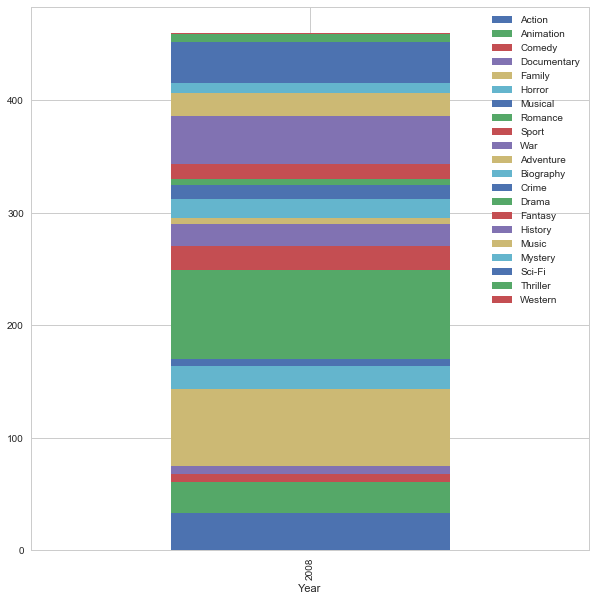

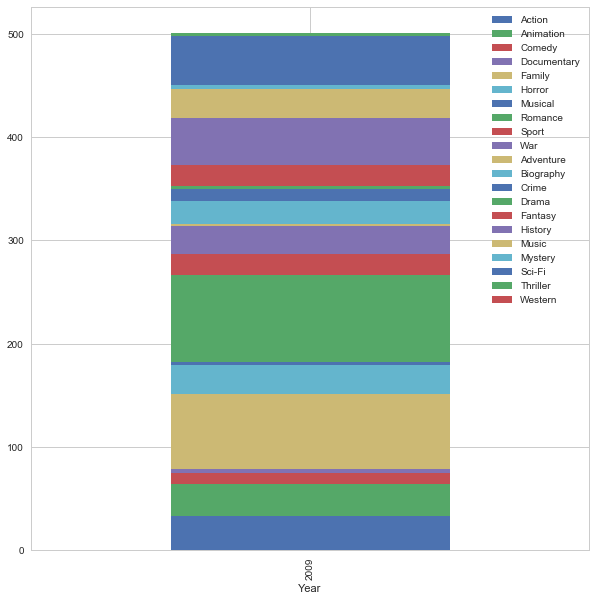

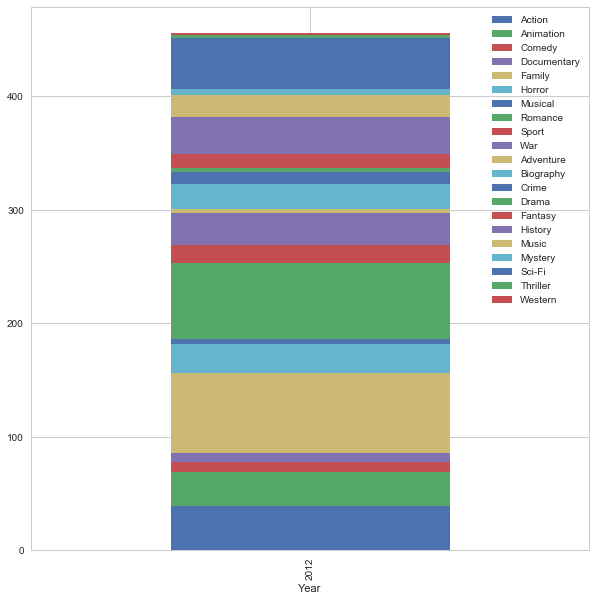

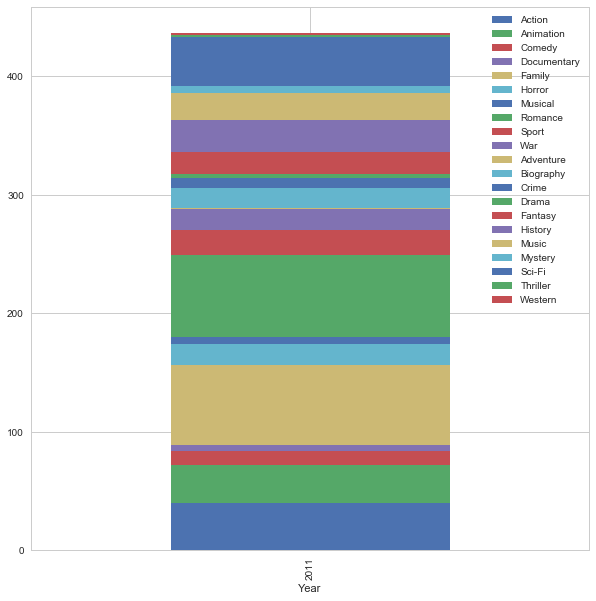

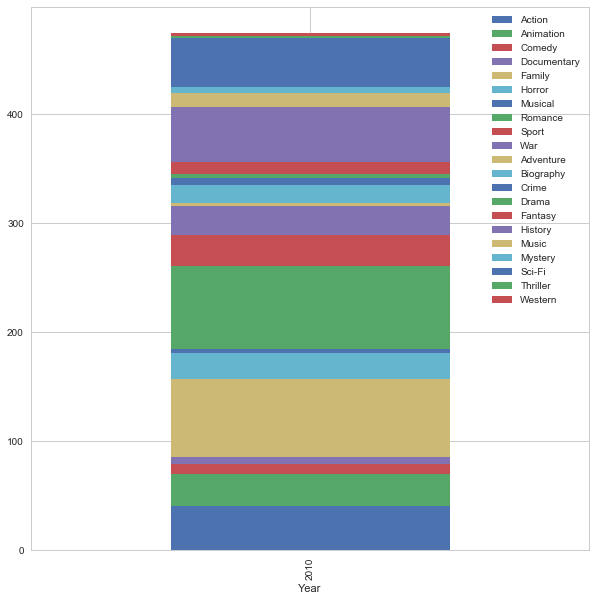

In [117]:
#plot each year with proportional genres
g1 =  genByGen.groupby(['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama',
                  'Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western'])

fig = g1.plot(kind='bar',figsize = (10,10),stacked=True,sharex =True)


In [118]:
#returns genre based on index
def getGenre(num):
    genrez = ['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama',
                  'Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western']
    return genrez[num]

In [119]:
#will make lines
linesMov = pd.DataFrame(columns = ['Genres','a','b'])
linesMov['Genres'] = ['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama',
                  'Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western']

In [120]:
#x = np.array(genByGen[tempGen])
#y = np.array(genByGen.index)
#for i in range (0,(len(genByGen.columns))-1):
#        tempGen = getGenre(i)
#        a,b = np.polyfit(x,y,1)
#        linesMov.ix[i,'a'] = a
#        linesMov.ix[i,'b'] = b

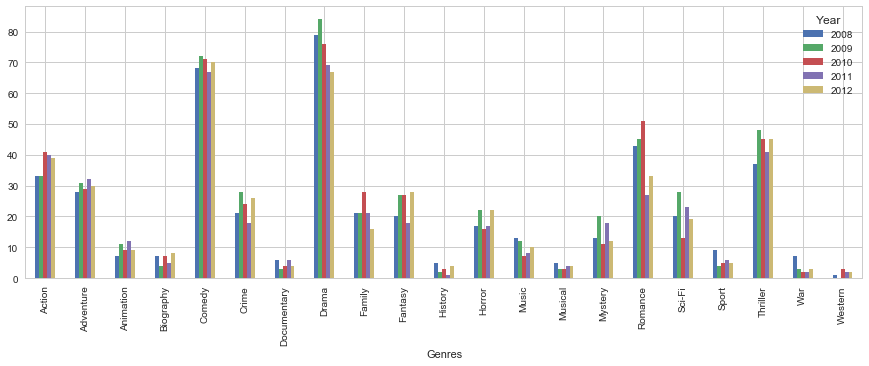

In [121]:
#Plot line graph for each year x = 'genres', y = 'amounts'
#each year is identical
genresY.plot.bar(figsize = (15,5))

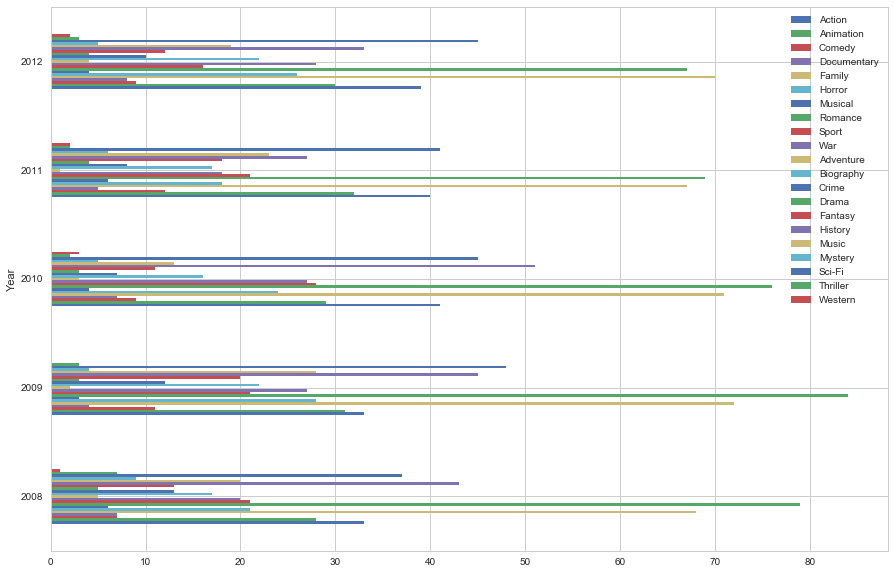

In [122]:
#Plot line graph for each year x = 'genres', y = 'amounts'
#each year is identical
genByGen.plot.barh(figsize = (15,10));plt.legend(loc='best')

#genresY.plot.line(figsize = (15,5))
#genresY['Action'].plot(kind='line')

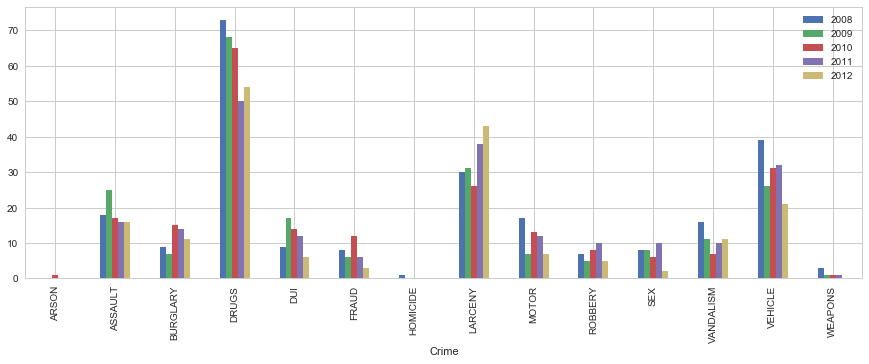

In [123]:
#Plot line graph for each year x = 'crime type', y = 'amounts'
#each year is identical
crime_pivot.plot.bar(figsize = (15,5))

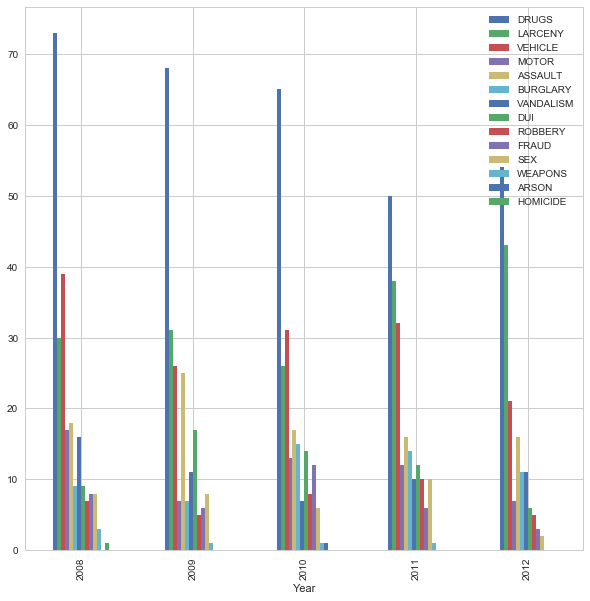

In [127]:
#Plot line graph for each year x = 'crimes', y = 'amounts'
#each year is identical
criByCri.plot.bar(figsize = (10,10));plt.legend(loc='best')


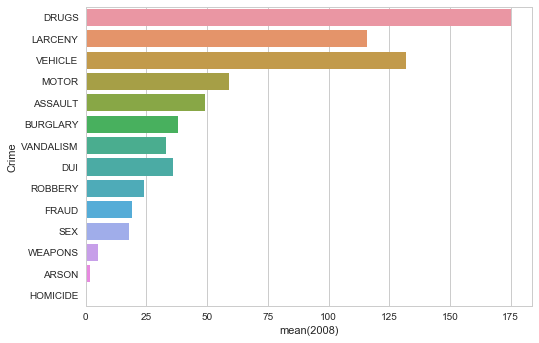

In [95]:
#crime 08
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2008', y='Crime', data=crimeY, orient = "h");

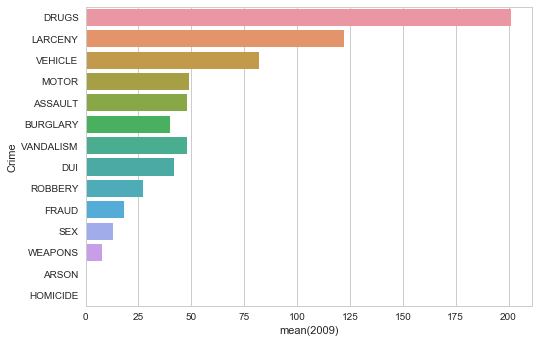

In [96]:
#crime 09
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2009', y='Crime', data=crimeY, orient = "h");

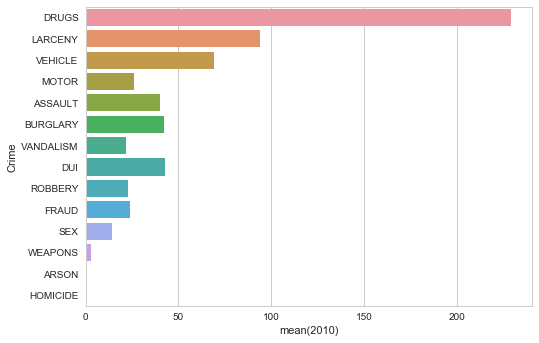

In [97]:
#crime 10
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2010', y='Crime', data=crimeY, orient = "h");

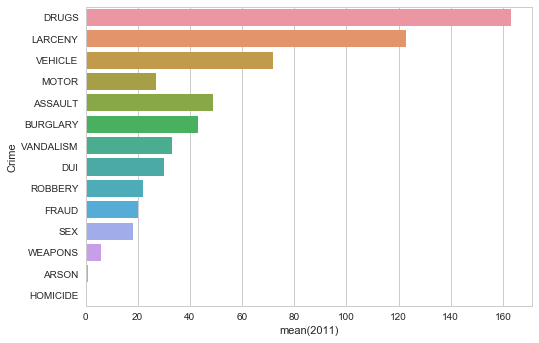

In [98]:
#crime 11
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2011', y='Crime', data=crimeY, orient = "h");

In [43]:
#Take year, genres, country from USASort and select movies from 1960-2012
m1 = USASort[['title_year', 'genres', 'country']]
m1 = m1[(m1.title_year > 1959) & (m1.title_year < 2013)]


In [44]:
#Get Crime, War, Horror, Action movies from Genres
c = 'Crime'
w = 'War'
h = 'Horror'
a = 'Action'

for index, row in m1.iterrows():
    if row['genres'].find(c or w or h or a) == -1 :
        m1.drop(index, inplace=True)

In [45]:
#Group and count genres which contains keyword 'crime','war','horror','action' in response to the year
m1 = m1[['title_year', 'genres']]
m1 = m1.groupby('title_year').count()

In [46]:
#Creating a vector that represents the keywoards in each year
vector = np.array([0, 1,1,1,0,0,1,2, 0,1,0,4,2,2,1,0,1, 0,0,2,1,3,1,3,3,2,2,5,4,4,5,9,8,8,16,17,23,25,20,23,26,41,35,31,22,24,21,27,22,29,24,19,
27])

In [149]:
#Get year, violent crime total from national report
selection = reportNational[['Year', 'Violent crime total']]
reportNational_pivot = pd.pivot_table(reportNational, index = "Year")

reportNational


,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
0,1960,179323175,288460,9110,17190,107840,154320,3095700,912100,1855400,328200
1,1961,182992000,289390,8740,17220,106670,156760,3198600,949600,1913000,336000
2,1962,185771000,301510,8530,17550,110860,164570,3450700,994300,2089600,366800
3,1963,188483000,316970,8640,17650,116470,174210,3792500,1086400,2297800,408300
4,1964,191141000,364220,9360,21420,130390,203050,4200400,1213200,2514400,472800
5,1965,193526000,387390,9960,23410,138690,215330,4352000,1282500,2572600,496900
6,1966,195576000,430180,11040,25820,157990,235330,4793300,1410100,2822000,561200
7,1967,197457000,499930,12240,27620,202910,257160,5403500,1632100,3111600,659800
8,1968,199399000,595010,13800,31670,262840,286700,6125200,1858900,3482700,783600
9,1969,201385000,661870,14760,37170,298850,311090,6749000,1981900,3888600,878500


In [48]:
#Creating a final report that contains year, violent crime, movies(contains the violent key words) nationally
col = ['year', 'violent crime', 'movies']
final_report = pd.DataFrame(columns = col)
final_report['year'] = selection['Year']
final_report['violent crime'] = selection['Violent crime total']
final_report['movies'] = vector
final_report

,year,violent crime,movies
0,1960,288460,0
1,1961,289390,1
2,1962,301510,1
3,1963,316970,1
4,1964,364220,0
5,1965,387390,0
6,1966,430180,1
7,1967,499930,2
8,1968,595010,0
9,1969,661870,1


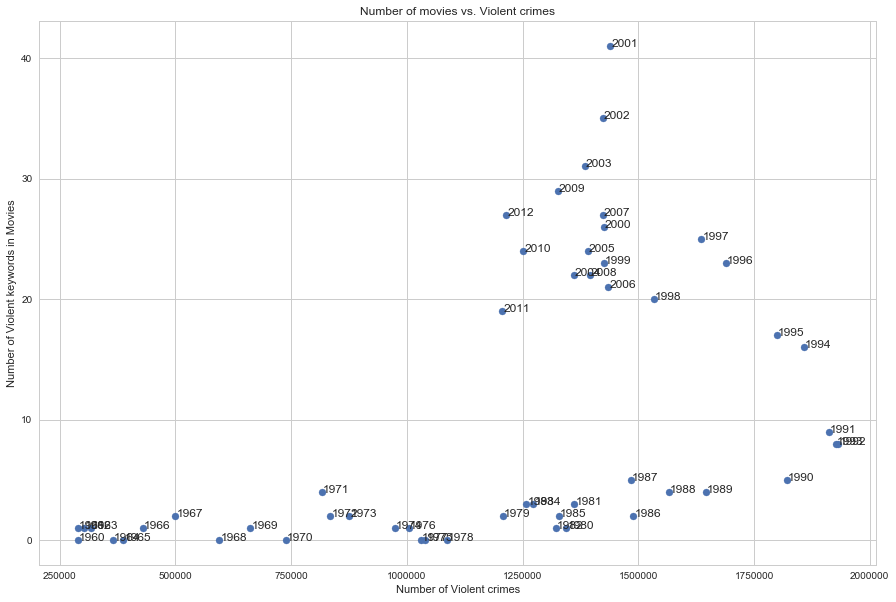

In [49]:
#Plot the result
plt.figure(figsize = (15, 10))
plt.scatter(final_report['violent crime'], final_report['movies'])
plt.title("Number of movies vs. Violent crimes")
for label, movie_count, crime_count in zip(final_report['year'], final_report['movies'], final_report['violent crime']):
    plt.annotate(label, xy = (crime_count, movie_count), xytext = (1, -1), textcoords = 'offset points')
    
plt.xlabel('Number of Violent crimes')
plt.ylabel('Number of Violent keywords in Movies')


Data Analysis & Results

In [159]:
valueN, pN, dfN, expectedN = chi2_contingency(observed= reportNational_pivot)


In [158]:
part_of_national = reportNational[48:53]
valuepN, pPN, dfPN, expectedPN= chi2_contingency(observed= part_of_national)


243072.09310896182

In [124]:
valueG, pG, dfG, expectedG = chi2_contingency(observed= genresY)
print(pG)


0.984870188048


In [125]:

valueC, pC, dfC, expectedC = chi2_contingency(observed = crime_no_zero )
print(pC)

0.489253717784


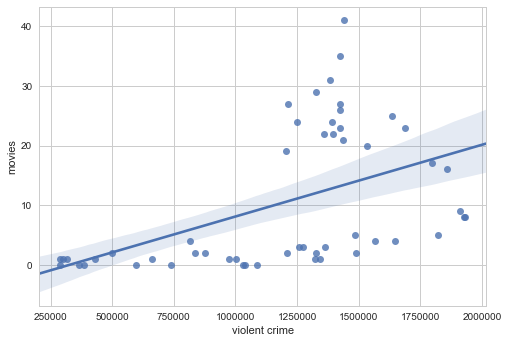

In [52]:
a1, b1 = np.polyfit(final_report['violent crime'], final_report['movies'], 1)
sns.regplot(final_report['violent crime'], final_report['movies'])

In [53]:
#sm.OLS()
result = sm.OLS(final_report['violent crime'], final_report['movies']).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          violent crime   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     68.13
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           5.06e-11
Time:                        11:53:29   Log-Likelihood:                -798.18
No. Observations:                  53   AIC:                             1598.
Df Residuals:                      52   BIC:                             1600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
movies      6.196e+04   7506.389      8.254      0.0